In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
import numpy as np

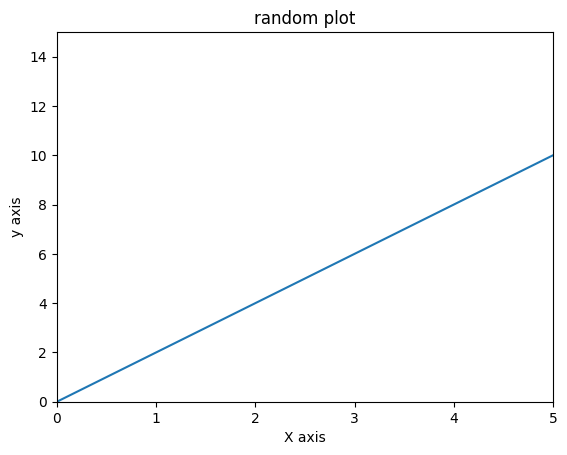

In [59]:
# plt parameters 
x = np.arange(0, 10, 1)
y = 2*x
plt.plot(x, y)
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.xlim(0,5)
plt.ylim(0, 15)
plt.title('random plot')

# # LOG SCALE
# plt.yscale("log")
# plt.grid(which='both',axis='y')

plt.show() # necessary in python script, in notebook will return both object, memory location and plot
# plt.savefigure('random_plot.png', bbox_inches='tight')

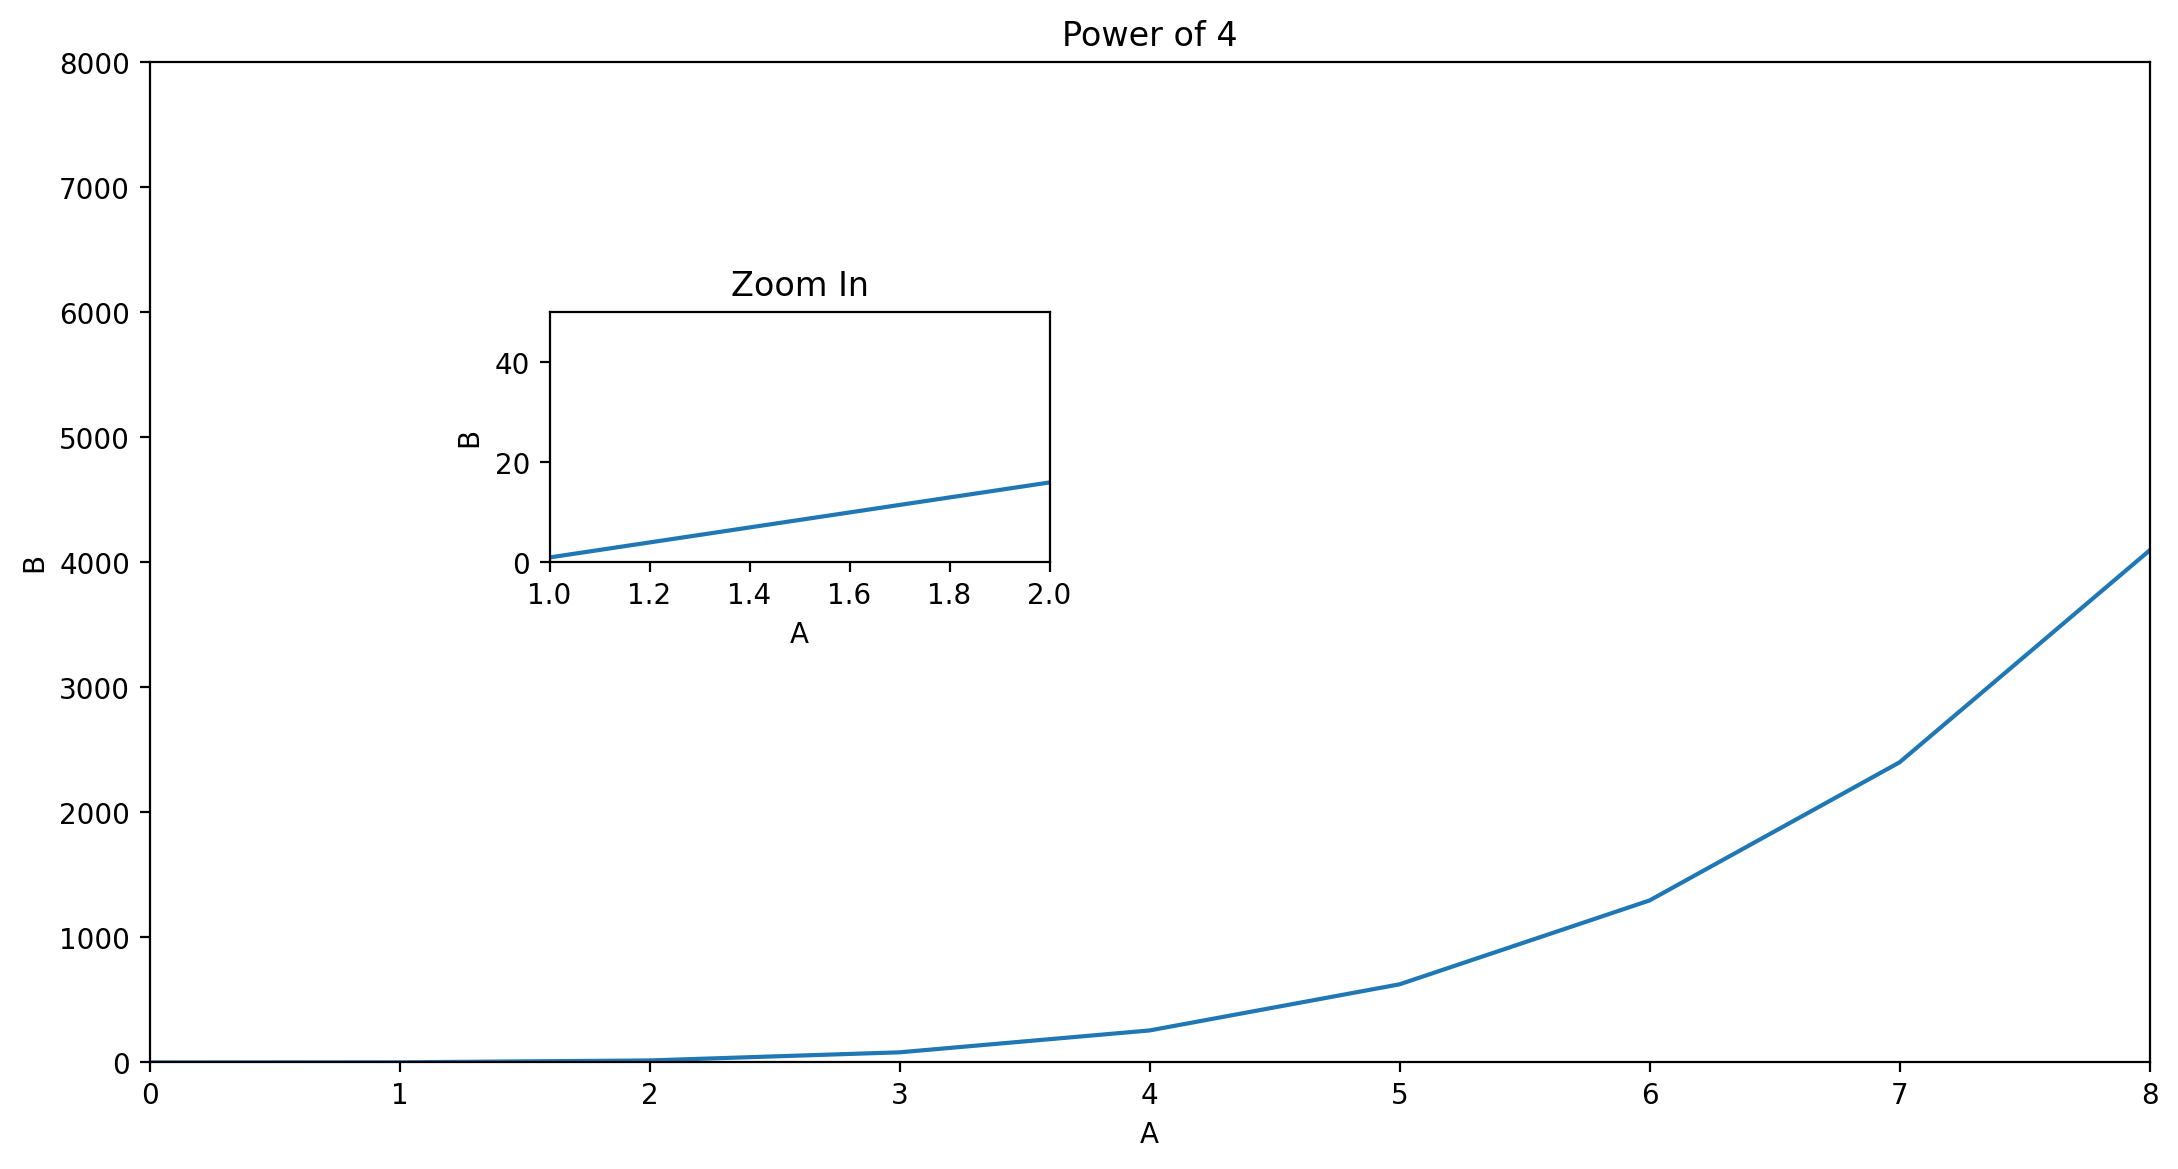

In [26]:
# plt oop
"""
Sequence: canvas -> set of axes -> draw on axes 
"""
a = np.linspace(0,10,11) # linearly spaced points 
b = a**4 
x = np.arange(0, 10)
y = 2*x

# create canvas 
fig = plt.figure(dpi=200, figsize=(10,))
# add axes 
axes1 = fig.add_axes([0,0,1,1]) # bottom left point location axes and legnth on x and y 
# plot the figure
axes1.plot(a, b)
# set axes parameters
axes1.set_xlim(0,8)
axes1.set_ylim(0,8000)
axes1.set_xlabel('A')
axes1.set_ylabel('B')
axes1.set_title('Power of 4')
# add another set of axes
axes2 = fig.add_axes([0.2, 0.5, 0.25, 0.25])
axes2.plot(a,b)
# set axes parameters
axes2.set_xlim(1,2)
axes2.set_ylim(0,50)
axes2.set_xlabel('A')
axes2.set_ylabel('B')
axes2.set_title('Zoom In')

plt.show()

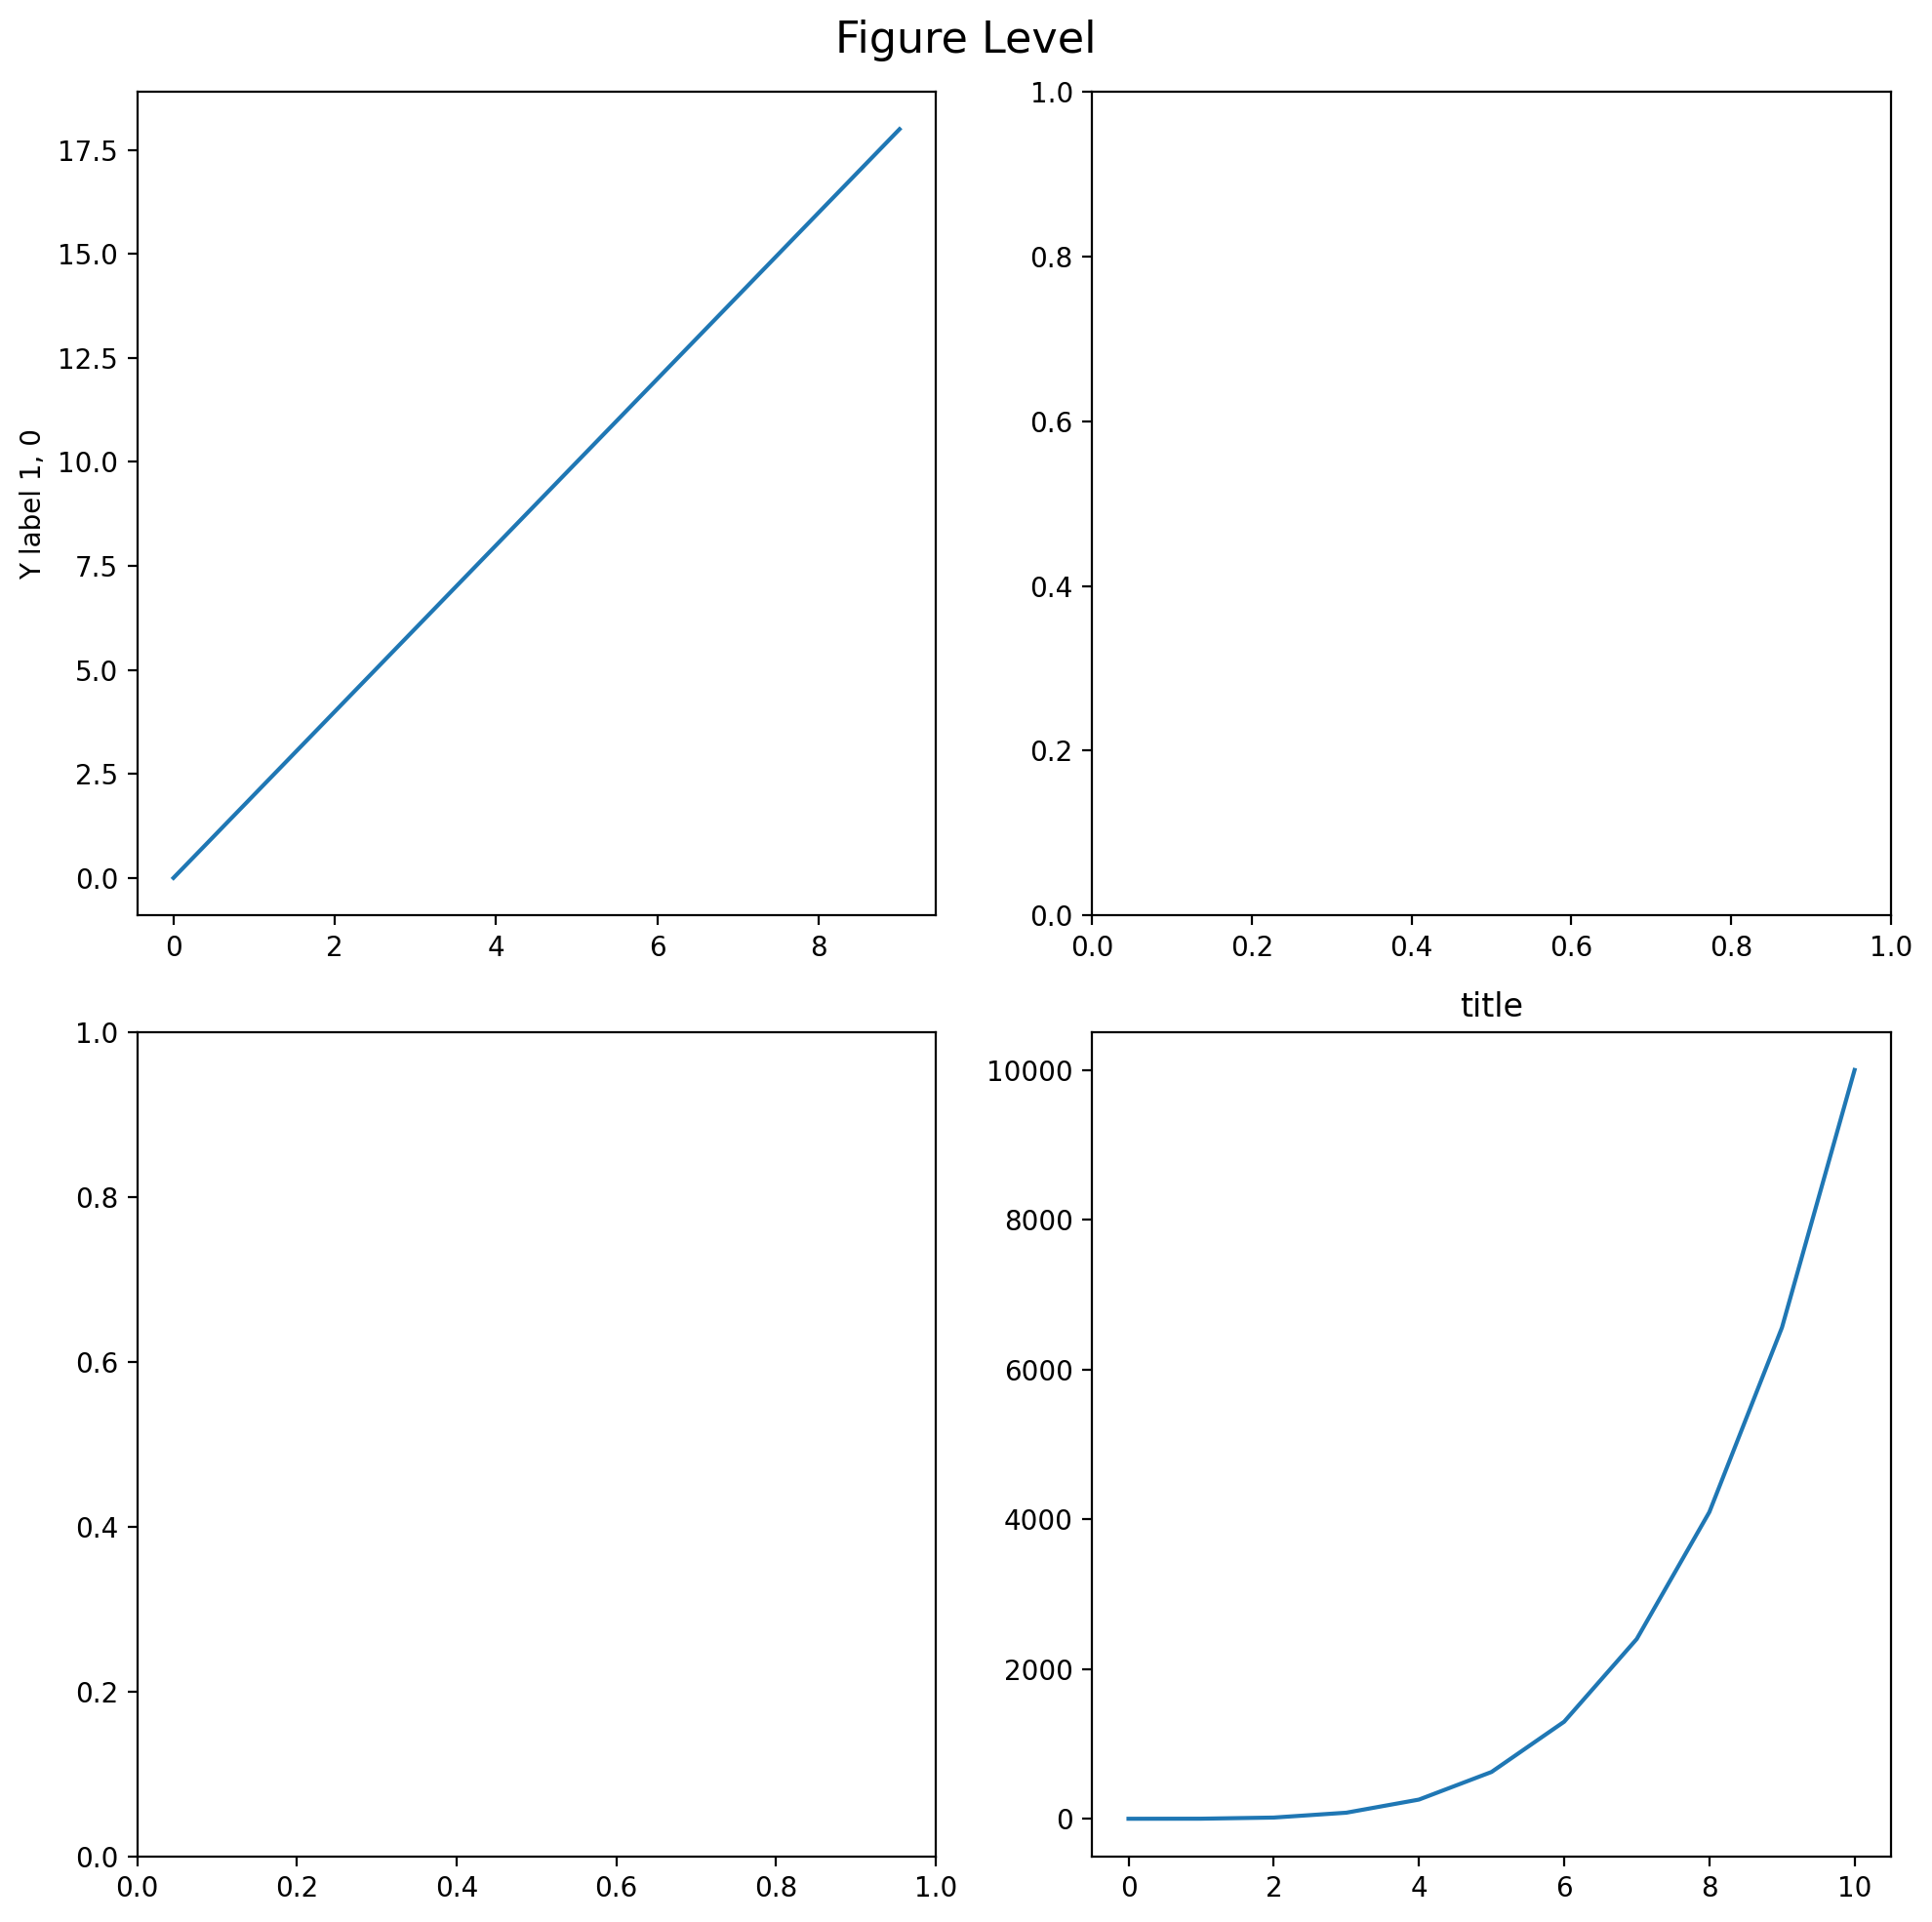

In [44]:
# subplots -> returns a tuple containing the figure canvas and a numpy array holding the axes objects
fig, axes = plt.subplots(figsize=(10,10), dpi=200, nrows=2, ncols=2)
axes[0,0].plot(x,y)
axes[0,0].set_ylabel('Y label 1, 0')
axes[1,1].plot(a,b)
axes[1,1].set_title('title')
# fig.subplots_adjust(wspace=0.8) # manual-spacing
fig.suptitle("Figure Level", fontsize=16)
fig.tight_layout()# auto-spacing

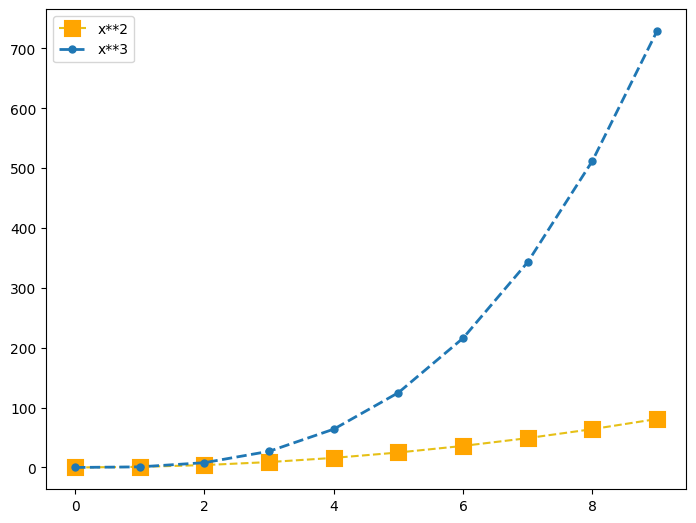

In [58]:
# legends 
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2", color="#e6c017", markeredgewidth=8,
       markeredgecolor='orange', markerfacecolor='red',
       marker='s', ls='--', ms=5) # hex color code
ax.plot(x, x**3, label="x**3", lw=2, marker='o',ms=5,ls='--') # possible linestype options ‘--‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.legend(loc=0)
# ax.legend(loc=(1, 1.1))

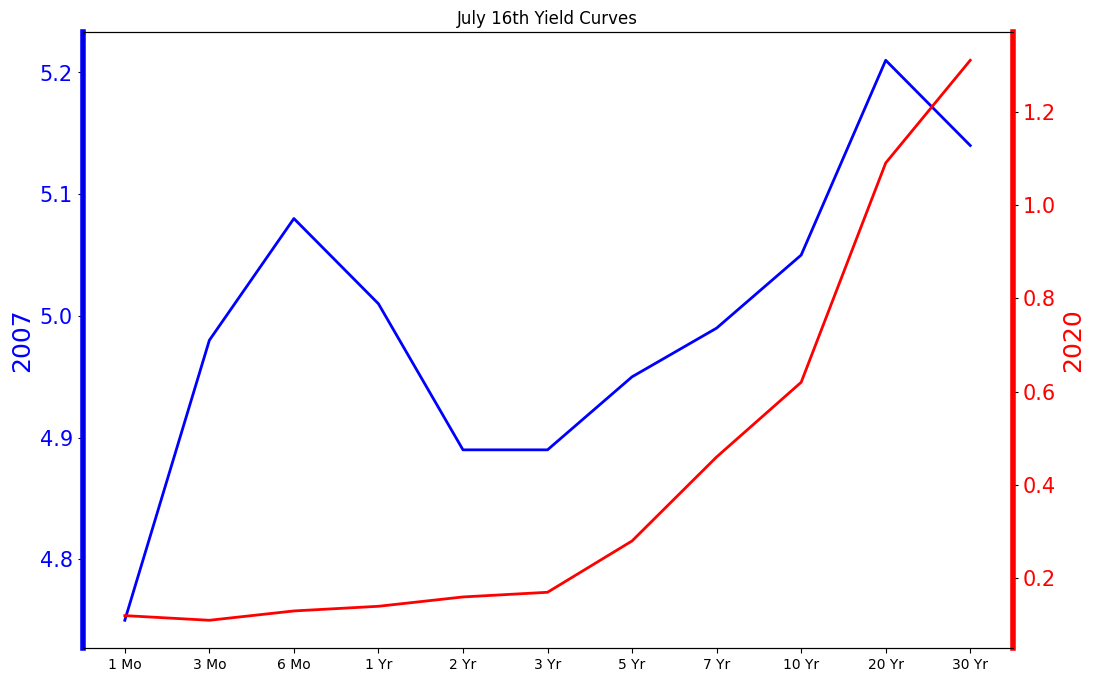

In [61]:
# double axes 
labels = ['1 Mo','3 Mo','6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']

july16_2007 =[4.75,4.98,5.08,5.01,4.89,4.89,4.95,4.99,5.05,5.21,5.14]
july16_2020 = [0.12,0.11,0.13,0.14,0.16,0.17,0.28,0.46,0.62,1.09,1.31]

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(labels,july16_2007, lw=2, color="blue")
ax1.set_ylabel("2007", fontsize=18, color="blue")

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(4)

for label in ax1.get_yticklabels():
    label.set_color("blue")
plt.yticks(fontsize=15)    
    
ax2 = ax1.twinx()
ax2.plot(labels,july16_2020, lw=2, color="red")
ax2.set_ylabel("2020", fontsize=18, color="red")

ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(4)

for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_title("July 16th Yield Curves");
plt.yticks(fontsize=15)

plt.show()

### Seaborn
1. Scatter Plots

          division  level of education  training level  work experience  \
0         printers        some college               2                6   
1         printers  associate's degree               2               10   
2      peripherals         high school               0                9   
3  office supplies  associate's degree               2                5   
4  office supplies         high school               1                5   

   salary   sales  
0   91684  372302  
1  119679  495660  
2   82045  320453  
3   92949  377148  
4   71280  312802  


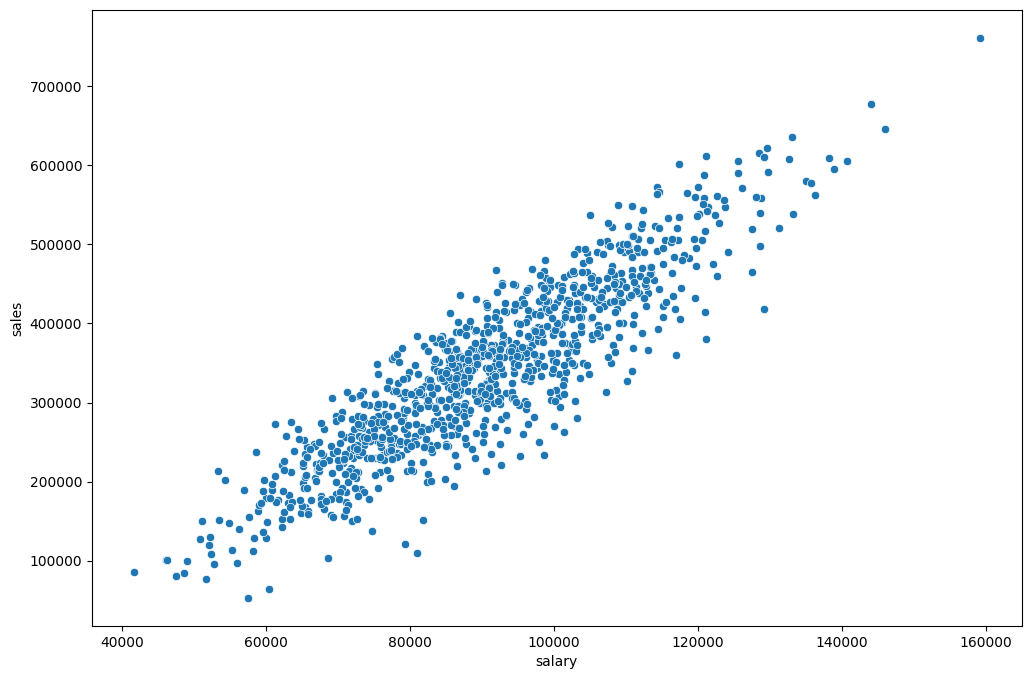

In [66]:
import pandas as pd

df = pd.read_csv("UNZIP_FOR_NOTEBOOKS_FINAL/05-Seaborn/dm_office_sales.csv")
print(df.head())
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df)
plt.show()

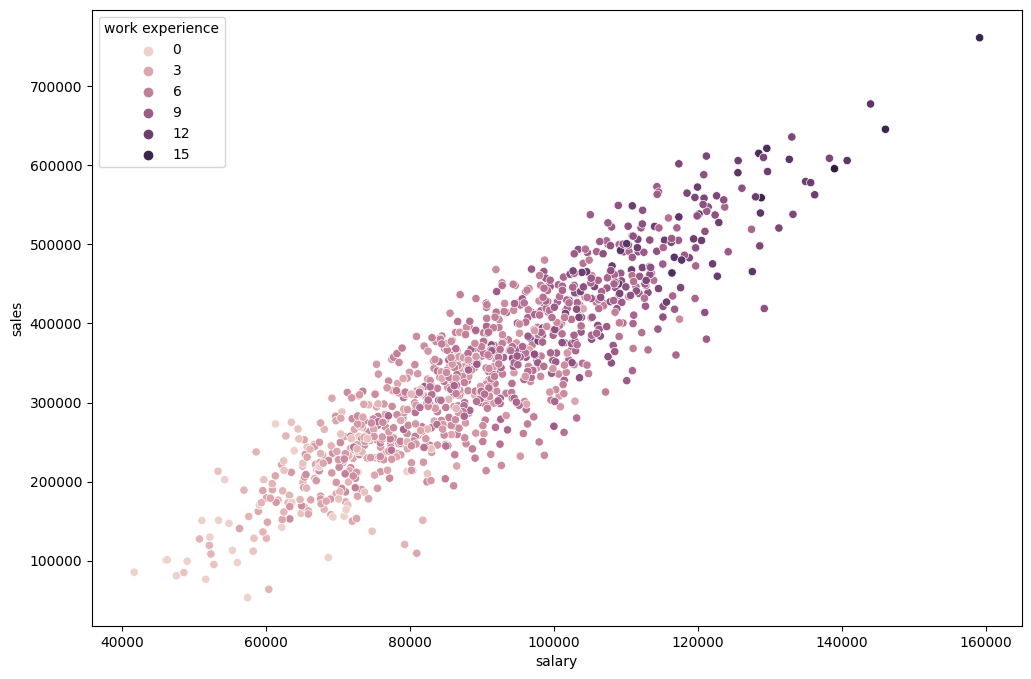

In [68]:
# hue 
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience');
# add palatte https://matplotlib.org/tutorials/colors/colormaps.html
# sns.scatterplot(x='salary',y='sales',data=df,hue='work experience',palette='viridis');

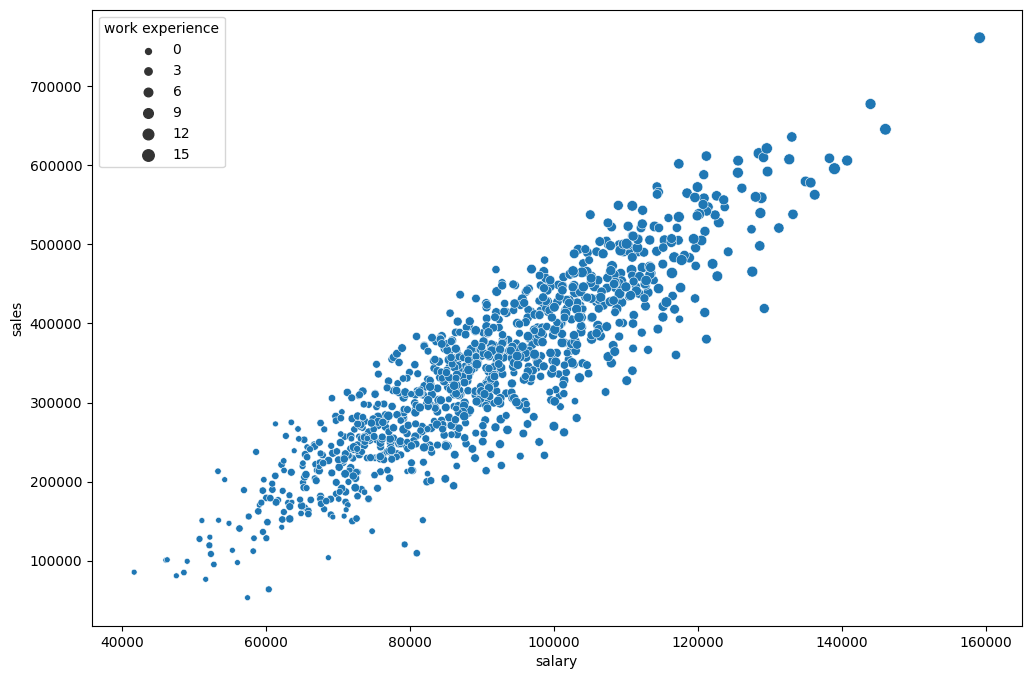

In [70]:
# size 
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,size='work experience'); # or use s=10 for fixed size

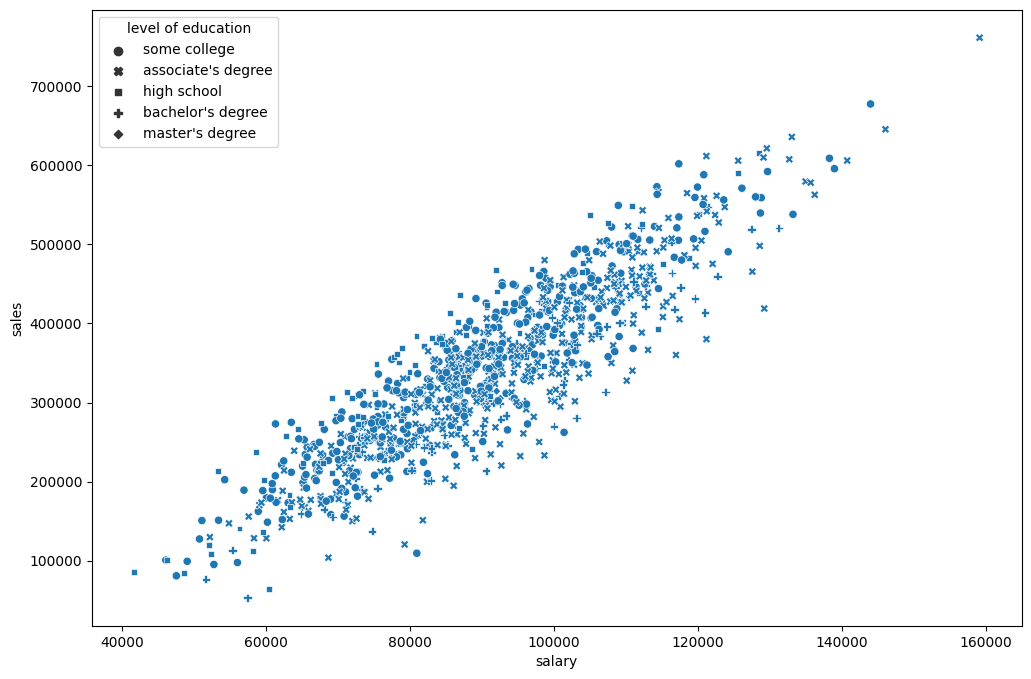

In [73]:
# marker style
"""
Automatically choose styles based on another categorical feature in the dataset. Optionally use the **markers=** parameter to pass a list of marker choices based off matplotlib, for example: ['*','+','o']
"""
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,style='level of education');
# plt.savefig('example_scatter.jpg')

2. Distribution plot

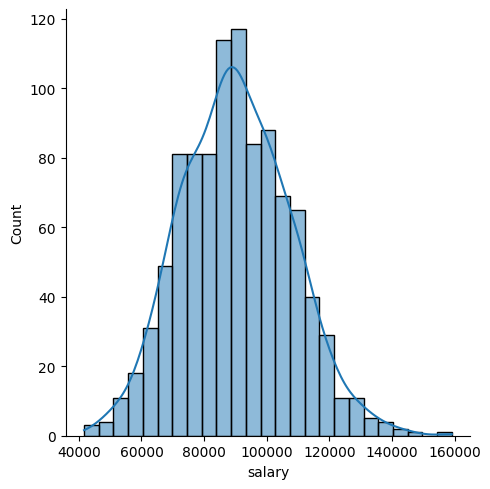

In [75]:
# hist
sns.displot(data=df,x='salary',kde=True);

3. categorical plots

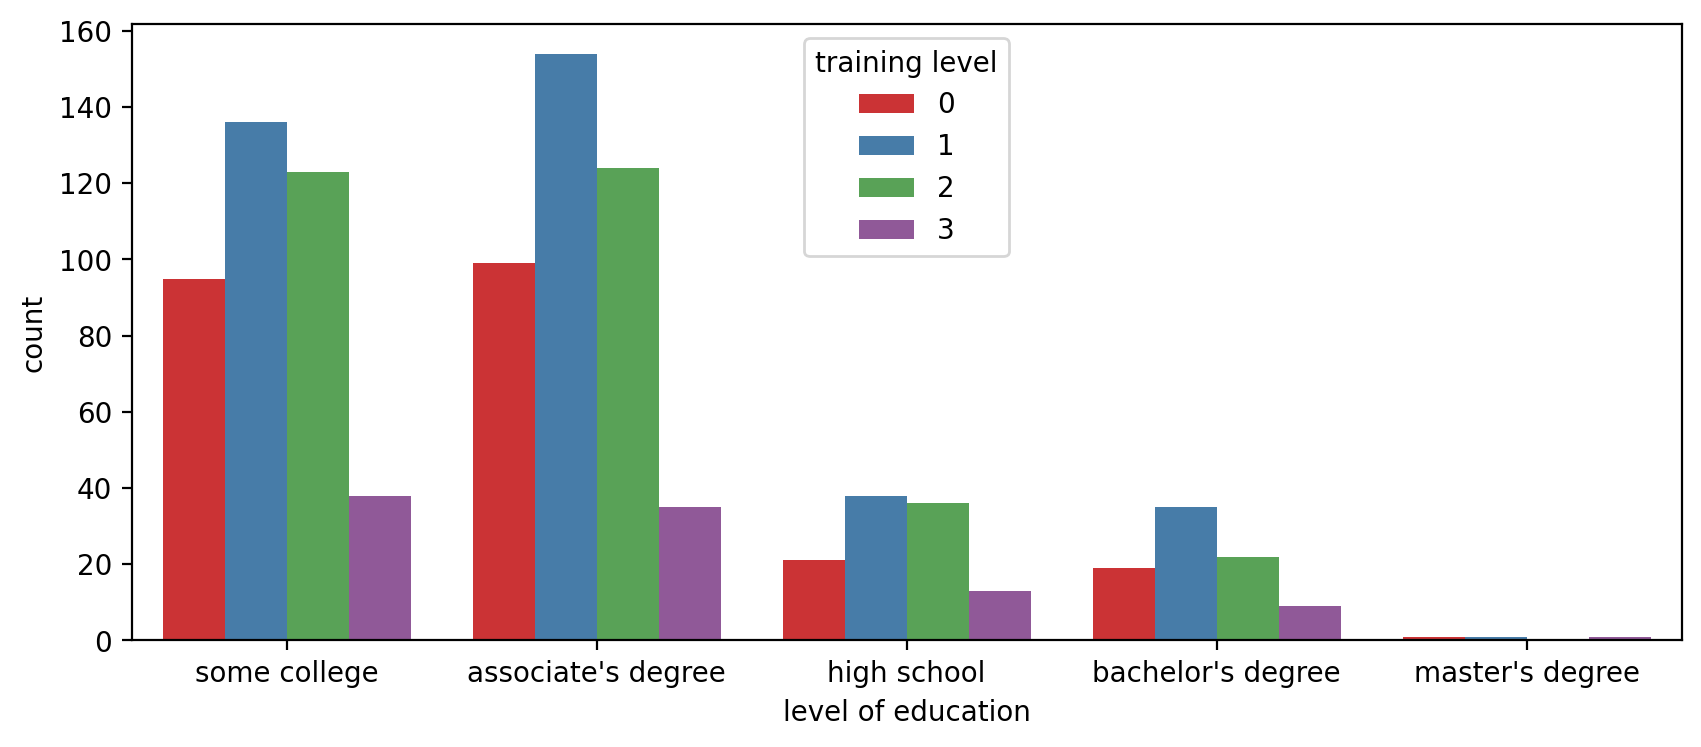

In [77]:
# countplot
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df,hue='training level',palette='Set1'); 

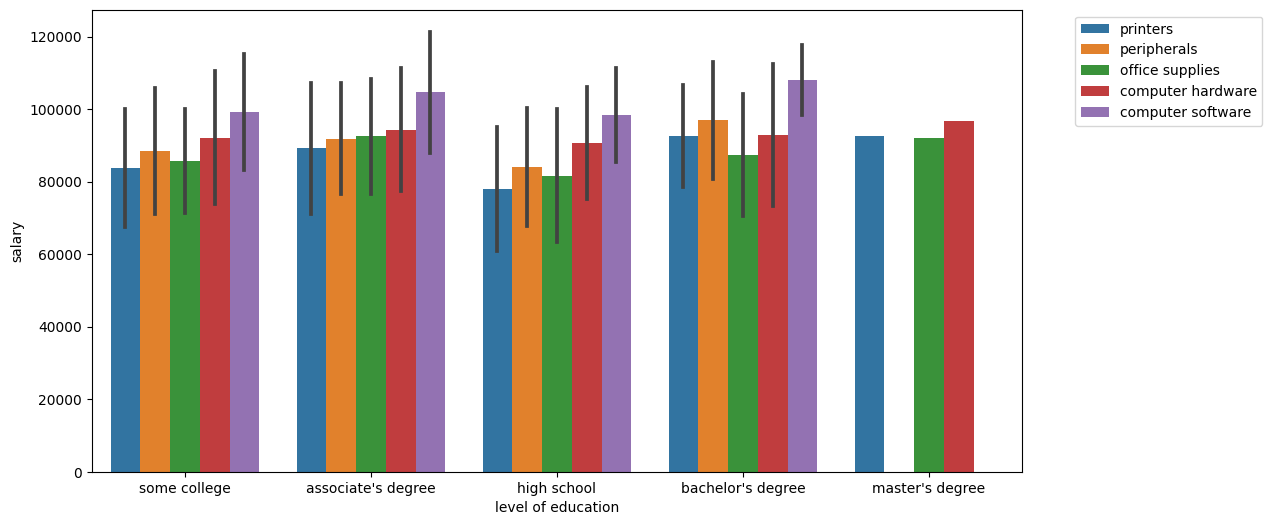

In [78]:
# bar plot
plt.figure(figsize=(12,6),dpi=100)

# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,ci='sd',hue='division')

plt.legend(bbox_to_anchor=(1.05, 1));